In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import datetime
from tensorflow.python import tf2
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [9]:
mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [11]:
#checking shape
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [16]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [12]:
#definig class name
class_name = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

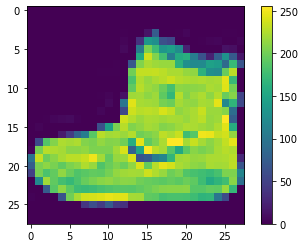

In [18]:
#plotting image
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

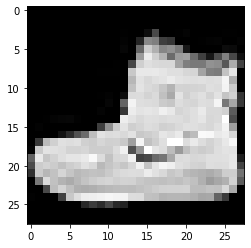

In [17]:
plt.imshow(X_train[0], cmap = 'gray')
plt.show()

In [19]:
# Normalize and flatten the images. It works better for backpropagation 
X_train = X_train / 255
X_test_original = X_test
X_test = X_test / 255

# Flatten the images. Images are to be input as vector
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

# Note that these vectors here are images, but they could be sound recordings, just regular rows from a dataset, anything. / 255)


In [23]:
model = Sequential([ # as far as we know, all networks are sequential
  Dense(64, activation='relu', input_shape=(784,)), # 784= 28*28 dense networks means all neurons in one layer are connected to all neurons of the next layer
  Dense(64, activation='relu'),      # choosing relu instead of sigmoid, this is somewhat common
  Dense(10, activation='softmax'),   # the softmax actiavation is the last one to compensate for the high volume additions
])

# Compile the model.
model.compile(
  optimizer='adam', #here we could use stochastic gradient descent, but adam is a de facto standard
  loss='categorical_crossentropy', #this is how we create the original blame to play the blame game
  metrics=['accuracy'],
)

# Train the model.
history = model.fit(
  X_train,
  to_categorical(y_train), # just to make sure the outputs are not considered numeric (because, ya know, they are numbers...)
  epochs=18, # go 20 times through the whole dataset
  batch_size=32, # send 32 images at a time before you tweak the network again, to make it faster
)


Epoch 1/18
1875/1875 [==============================] - 1s 546us/step - loss: 0.5086 - accuracy: 0.8188
Epoch 2/18
1875/1875 [==============================] - 1s 543us/step - loss: 0.3738 - accuracy: 0.8628
Epoch 3/18
1875/1875 [==============================] - 1s 539us/step - loss: 0.3396 - accuracy: 0.8759
Epoch 4/18
1875/1875 [==============================] - 1s 537us/step - loss: 0.3182 - accuracy: 0.8826
Epoch 5/18
1875/1875 [==============================] - 1s 540us/step - loss: 0.3005 - accuracy: 0.8875
Epoch 6/18
1875/1875 [==============================] - 1s 541us/step - loss: 0.2867 - accuracy: 0.8917
Epoch 7/18
1875/1875 [==============================] - 1s 538us/step - loss: 0.2748 - accuracy: 0.8975
Epoch 8/18
1875/1875 [==============================] - 1s 539us/step - loss: 0.2646 - accuracy: 0.9006
Epoch 9/18
1875/1875 [==============================] - 1s 539us/step - loss: 0.2568 - accuracy: 0.9036
Epoch 10/18
1875/1875 [==============================] - 1s 540u

In [25]:
# Evaluate the model.
model.evaluate(
  X_test,
  to_categorical(y_test)
)

313/313 [==============================] - 0s 363us/step - loss: 0.3562 - accuracy: 0.8807


[0.35622337460517883, 0.8806999921798706]

In [27]:
# Predict on the first 5 test images.
predictions = model.predict(X_test[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) 
predictions

# argmax: index of the highest number

1/1 [==============================] - 0s 49ms/step
[9 2 1 1 6]


array([[6.4463123e-08, 4.2861578e-12, 1.8135222e-10, 1.8319840e-09,
        4.4544069e-13, 3.2598455e-04, 8.2833409e-08, 3.1430635e-04,
        6.6419958e-10, 9.9935955e-01],
       [1.3382584e-04, 1.5281928e-16, 9.9788767e-01, 1.0574143e-08,
        1.7798136e-03, 2.9196761e-19, 1.9867596e-04, 2.7676969e-15,
        5.9842803e-14, 3.6794317e-18],
       [1.2735957e-15, 1.0000000e+00, 8.4917255e-21, 3.5137214e-15,
        5.3760981e-19, 1.8679528e-31, 3.9587424e-16, 2.2291775e-36,
        6.8281368e-21, 0.0000000e+00],
       [6.8234216e-14, 1.0000000e+00, 5.6214660e-16, 9.9508561e-12,
        4.4779827e-14, 1.9332855e-24, 3.0506468e-13, 3.5109133e-27,
        3.4357678e-17, 1.3642854e-30],
       [1.0121332e-01, 1.8152720e-09, 2.0244531e-02, 5.7410996e-04,
        4.5956993e-03, 1.9786627e-08, 8.7337148e-01, 2.6184728e-07,
        4.7966051e-07, 6.5763039e-08]], dtype=float32)

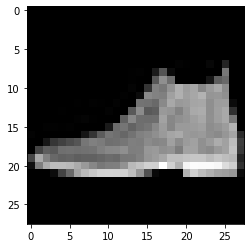

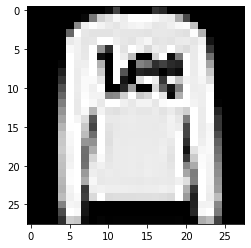

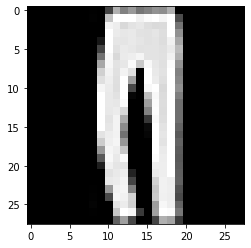

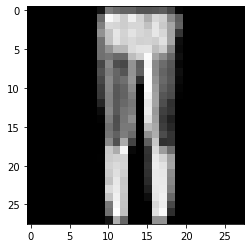

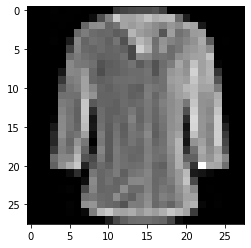

In [28]:
for i in range(5):
  plt.imshow(X_test_original[i], cmap = 'gray')
  plt.show()

In [29]:
#predict on all images:
predictions_all = model.predict(X_test)

wrong_pred = [i for i in range(len(predictions_all)) if np.argmax(predictions_all[i]) != y_test[i]]


313/313 [==============================] - 0s 319us/step


In [30]:
wrong_pred

[12,
 17,
 19,
 23,
 25,
 40,
 42,
 49,
 57,
 66,
 67,
 68,
 113,
 135,
 141,
 147,
 150,
 153,
 155,
 172,
 192,
 222,
 239,
 244,
 245,
 249,
 255,
 271,
 282,
 283,
 309,
 314,
 316,
 324,
 325,
 354,
 361,
 367,
 374,
 378,
 381,
 382,
 394,
 396,
 404,
 406,
 431,
 441,
 444,
 452,
 454,
 457,
 460,
 471,
 473,
 476,
 491,
 498,
 500,
 511,
 526,
 529,
 548,
 563,
 565,
 570,
 573,
 577,
 578,
 581,
 584,
 586,
 595,
 607,
 610,
 628,
 632,
 639,
 663,
 664,
 669,
 670,
 681,
 688,
 689,
 711,
 716,
 717,
 719,
 722,
 725,
 732,
 747,
 753,
 760,
 761,
 787,
 800,
 801,
 824,
 830,
 851,
 860,
 870,
 881,
 890,
 893,
 894,
 902,
 905,
 907,
 910,
 921,
 926,
 935,
 939,
 965,
 972,
 976,
 979,
 985,
 994,
 1000,
 1005,
 1026,
 1029,
 1055,
 1064,
 1079,
 1101,
 1104,
 1111,
 1131,
 1139,
 1152,
 1158,
 1160,
 1162,
 1165,
 1207,
 1210,
 1218,
 1223,
 1231,
 1254,
 1280,
 1294,
 1297,
 1300,
 1305,
 1306,
 1315,
 1326,
 1329,
 1336,
 1339,
 1343,
 1353,
 1368,
 1374,
 1377,
 1388,


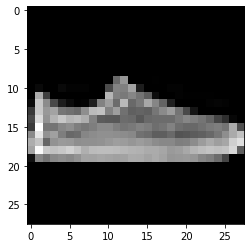

Prediction: 5, Actual: 7.


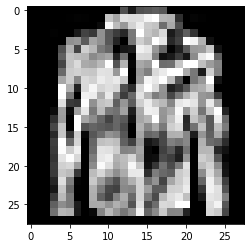

Prediction: 2, Actual: 4.


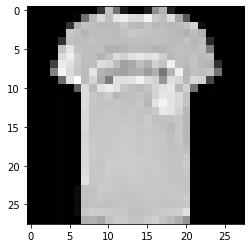

Prediction: 6, Actual: 0.


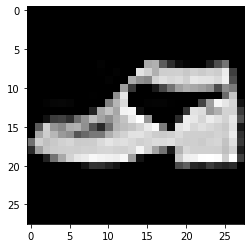

Prediction: 5, Actual: 9.


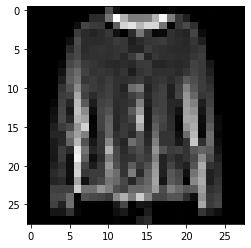

Prediction: 2, Actual: 4.


In [31]:
for i in [12, 17, 19, 23, 25]:
    plt.imshow(X_test_original[i], cmap = 'gray')
    plt.show()
    print(f'Prediction: {np.argmax(predictions_all[i])}, Actual: {y_test[i]}.')
